In [1]:
import xarray as xr
import numpy as np
import OpenVisus as ov
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime
import math

from tqdm import tqdm

## Defining a function to get the current date from a timestep

In [2]:
def get_date_from_timestep(year: int, timestep: int) -> datetime.datetime:
    day = math.floor(timestep / 24)
    hour = timestep % 24
    
    start_of_year = datetime.datetime(year=year, month=1, day=1, hour=hour)
    current_date = start_of_year + datetime.timedelta(days=day)
    
    return current_date

## Defining a function to get a field from a timestep as a numpy array

In [3]:
def get_field_from_timestep(year: int, timestep: int, field: str) -> np.ndarray:
    idx = ov.LoadDataset('http://atlantis.sci.utah.edu/mod_visus?dataset=ANL_cstm_d01_2')
    
    return idx.read(field=field, time=timestep)

## Defining a function to calculate the extents of the longitude and latitude

In [4]:
def get_extent_from_timestep(year: int, timestep: int):
    longitudes = get_field_from_timestep(year, timestep, 'longitude')
    latitudes = get_field_from_timestep(year, timestep, 'latitude')
    
    min_lon = np.min(longitudes)
    longitudes_b = np.where(longitudes < 0, longitudes, min_lon)
    
    return [np.min(longitudes_b),np.max(longitudes_b), np.min(latitudes), np.max(latitudes)]

## Example: Plotting the data as a scatter plot

In [5]:
year = 2016
timestep = 2904
field = 'temperature_2m'
field_name = 'Temperature at 2m AGL'
field_units = 'K'
colormap = 'turbo'

In [6]:
title = f'{field_name} ({get_date_from_timestep(year=year, timestep=timestep)})'
data = get_field_from_timestep(year=year, timestep=timestep, field=field)
longitudes = get_field_from_timestep(year=year, timestep=timestep, field='longitude')
latitudes = get_field_from_timestep(year=year, timestep=timestep, field='latitude')
extent = get_extent_from_timestep(year=year, timestep=timestep)

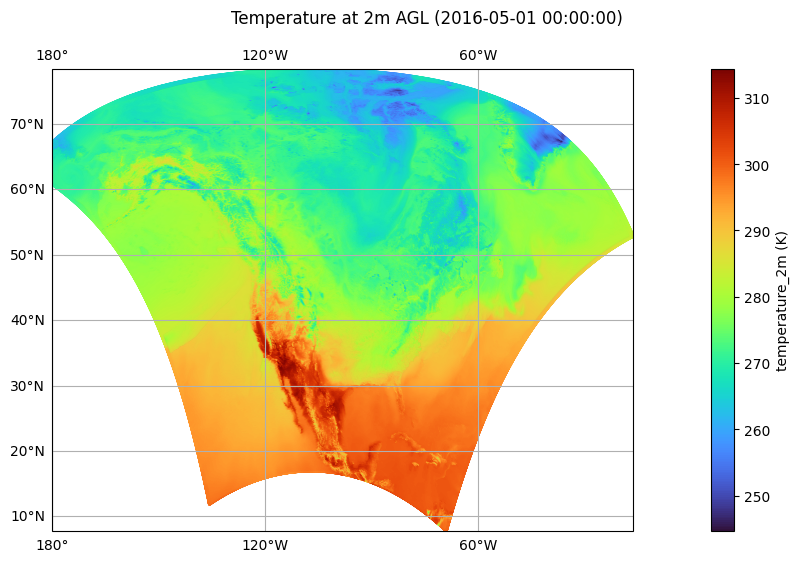

CPU times: user 18 s, sys: 410 ms, total: 18.4 s
Wall time: 17.6 s


In [7]:
%%time

fig = plt.figure(figsize=(10, 6))
axes = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plot = axes.scatter(longitudes, latitudes, c=data, cmap=colormap, s=1, transform=ccrs.PlateCarree())
axes.coastlines()
axes.set_aspect('auto', adjustable='datalim')
axes.set_extent(extent, crs=ccrs.PlateCarree())
axes.gridlines(draw_labels=True)
fig.suptitle(title)
fig.colorbar(plot, location='right', pad=0.1, label=f'{field} ({field_units})')

plt.show()